<a href="https://colab.research.google.com/github/kumiori/mec647/blob/main/mec647_BCs_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [ ]:
%%capture
import sys

try:
    import google.colab  # noqa: F401
except ImportError:
    import ufl  # noqa: F401
    import dolfinx  # noqa: F401
else:
    try:
        import ufl
        import dolfinx
    except ImportError:
        !wget "https://fem-on-colab.github.io/releases/fenicsx-install.sh" -O "/tmp/fenicsx-install.sh" && bash "/tmp/fenicsx-install.sh";
        import ufl  # noqa: F401
        import dolfinx  # noqa: F401

In [ ]:
%%capture
!sudo apt install libgl1-mesa-glx xvfb;
!{sys.executable} -m pip install pythreejs;
!{sys.executable} -m pip install ipygany;
!{sys.executable} -m pip install --upgrade pyyaml
try:
    import google.colab
except ImportError:
    pass
else:
    pass
    # google.colab.output.enable_custom_widget_manager();
try:
    import pyvista
except ImportError:
    !pip3 install --upgrade pyvista itkwidgets;
    import pyvista  # noqa: F401
    from pyvista.utilities import xvfb

try:
    import gmsh
except ImportError:
    !{sys.executable} -m pip install gmsh
    import gmsh

In [ ]:
!rm -rf mec647

try:
  !git clone https://github.com/kumiori/mec647.git
except Exception:
  print('Something went wrong')

  !rm -rf mec647
  !git clone https://github.com/kumiori/mec647.git


Cloning into 'mec647'...
remote: Enumerating objects: 495, done.
remote: Counting objects: 100% (495/495), done.
remote: Compressing objects: 100% (403/403), done.
remote: Total 495 (delta 208), reused 221 (delta 74), pack-reused 0
Receiving objects: 100% (495/495), 7.12 MiB | 11.59 MiB/s, done.
Resolving deltas: 100% (208/208), done.


In [ ]:
sys.path.append('mec647/')

In [ ]:

# meshes
import meshes
from meshes import primitives

# visualisation
from utils import viz
import matplotlib.pyplot as plt
from utils.viz import plot_mesh

In [ ]:
# Parameters

parameters = {
    'loading': {
        'min': 0,
        'max': 1
    },
    'geometry': {
        'geom_type': 'bar',
        'Lx': 1.,
        'Ly': 0.1
    }
}

# parameters.get('loading')



## Mesh 1


In [ ]:
def mesh_holes(Lx = 1., Ly = 1.):
  import gmsh

  # Initialise gmsh and set options
  gmsh.initialize()
  gmsh.option.setNumber("General.Terminal", 1)

  gmsh.option.setNumber("Mesh.Algorithm", 6)
  model = gmsh.model()
  model.add("Rectangle")
  model.setCurrent("Rectangle")
  # Lx, Ly

In [ ]:
mesh_holes()

## Mesh 2


In [ ]:
# Mesh kink

## Mesh 3


In [ ]:
# mesh ...

## Meshes, domains and boundary conditions


In [ ]:
import meshes

In [ ]:
gmsh_model, tdim = primitives.mesh_bar_gmshapi(name = 'bar', 
                                  Lx = 1.,
                                  Ly = .1,
                                  lc = .05,
                                  tdim = 2)

# Get mesh and meshtags
mesh, mts = meshes.gmsh_model_to_mesh(gmsh_model,
                               cell_data=False,
                               facet_data=True,
                               gdim=2)


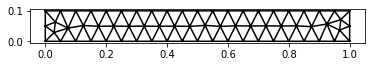

In [ ]:
viz.plot_mesh(mesh)

In [ ]:
dir(mts)

In [ ]:
import ufl
ds = ufl.Measure("ds", subdomain_data=mts, domain=mesh)


In [ ]:
from dolfinx.fem import Constant, form
from petsc4py.PETSc import ScalarType

dolfinx.fem.assemble_scalar(form(Constant(mesh, 1.)*ds) )




2.1999999999999997

In [ ]:
Constant(mesh, 1.)

Constant(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1, variant='equispaced'), dim=2, variant='equispaced'), 1), (), 1)

In [ ]:
dolfinx.fem.assemble_scalar(form(Constant(mesh, 1.)*ds(6)) )


0.1

In [ ]:
from dolfinx.fem.bcs import locate_dofs_geometrical
import basix.ufl

# indentify dof
import numpy as np
element = basix.ufl.element("Lagrange", mesh.basix_cell(), degree=1)
V = dolfinx.fem.functionspace(mesh, element)

dofs_left = locate_dofs_geometrical(V, lambda x: np.isclose(x[0], 0.))

u_given = dolfinx.fem.Function(V)

dolfinx.fem.dirichletbc(u_given, dofs_left)

# construct the bc

In [ ]:
u_given.interpolate( lambda x: np.ones_like(x[0]) )

In [ ]:
# Locate facets topologically
facet_dim = tdim - 1 
facets = dolfin.fem.locate_entities_boundary(mesh, facet_dim, <function>)
# <function>(x): true/false 
dirichletbc(<Constant, Expression, ...>, locate_dofs_topological(V, 1, facets), V)

